# Exploración de datos

In [3]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

## Diferenciales

### Carga de datos 

In [42]:
meteo_df = pd.read_excel(get_project_root() / 'data' / 'raw' / 'Torre Meteo Codelco Ventanas.xlsx')#.set_index('date')

In [44]:
meteo_df['T_dif'] = meteo_df['T_40'] - meteo_df['T_10']
meteo_df['WD_dif'] = meteo_df['WD_40'] - meteo_df['WD_10']
meteo_df['WS_dif'] = meteo_df['WS_40'] - meteo_df['WS_10']
meteo_df['SigDir_dif'] = meteo_df['SigDir_40'] - meteo_df['SigDir_10']
meteo_df['HR_dif'] = meteo_df['HR_40'] - meteo_df['HR_10']

meteo_df = meteo_df[['date'] + meteo_df.columns[-5:].tolist()]

In [45]:
meteo_df.head()

,date,T_dif,WD_dif,WS_dif,SigDir_dif,HR_dif
0,2017-01-01 01:00:00,0.2768,2.7303,-0.35788,20.98000,-6.2247
1,2017-01-01 02:00:00,0.3665,-0.0120,-1.02448,37.48000,-6.1518
2,2017-01-01 03:00:00,0.5527,-29.6691,0.76479,10.35800,-5.0900
3,2017-01-01 04:00:00,0.8930,-43.4263,0.58976,0.69000,-5.2384
4,2017-01-01 05:00:00,0.7969,-39.7236,0.02338,8.15001,-5.0584


In [15]:
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50298 entries, 2017-01-01 01:00:00 to 2022-09-27 18:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_dif       49264 non-null  float64
 1   WD_dif      49047 non-null  float64
 2   WS_dif      49047 non-null  float64
 3   SigDir_dif  49533 non-null  float64
 4   HR_dif      49406 non-null  float64
dtypes: float64(5)
memory usage: 2.3 MB


### Visualización inicial

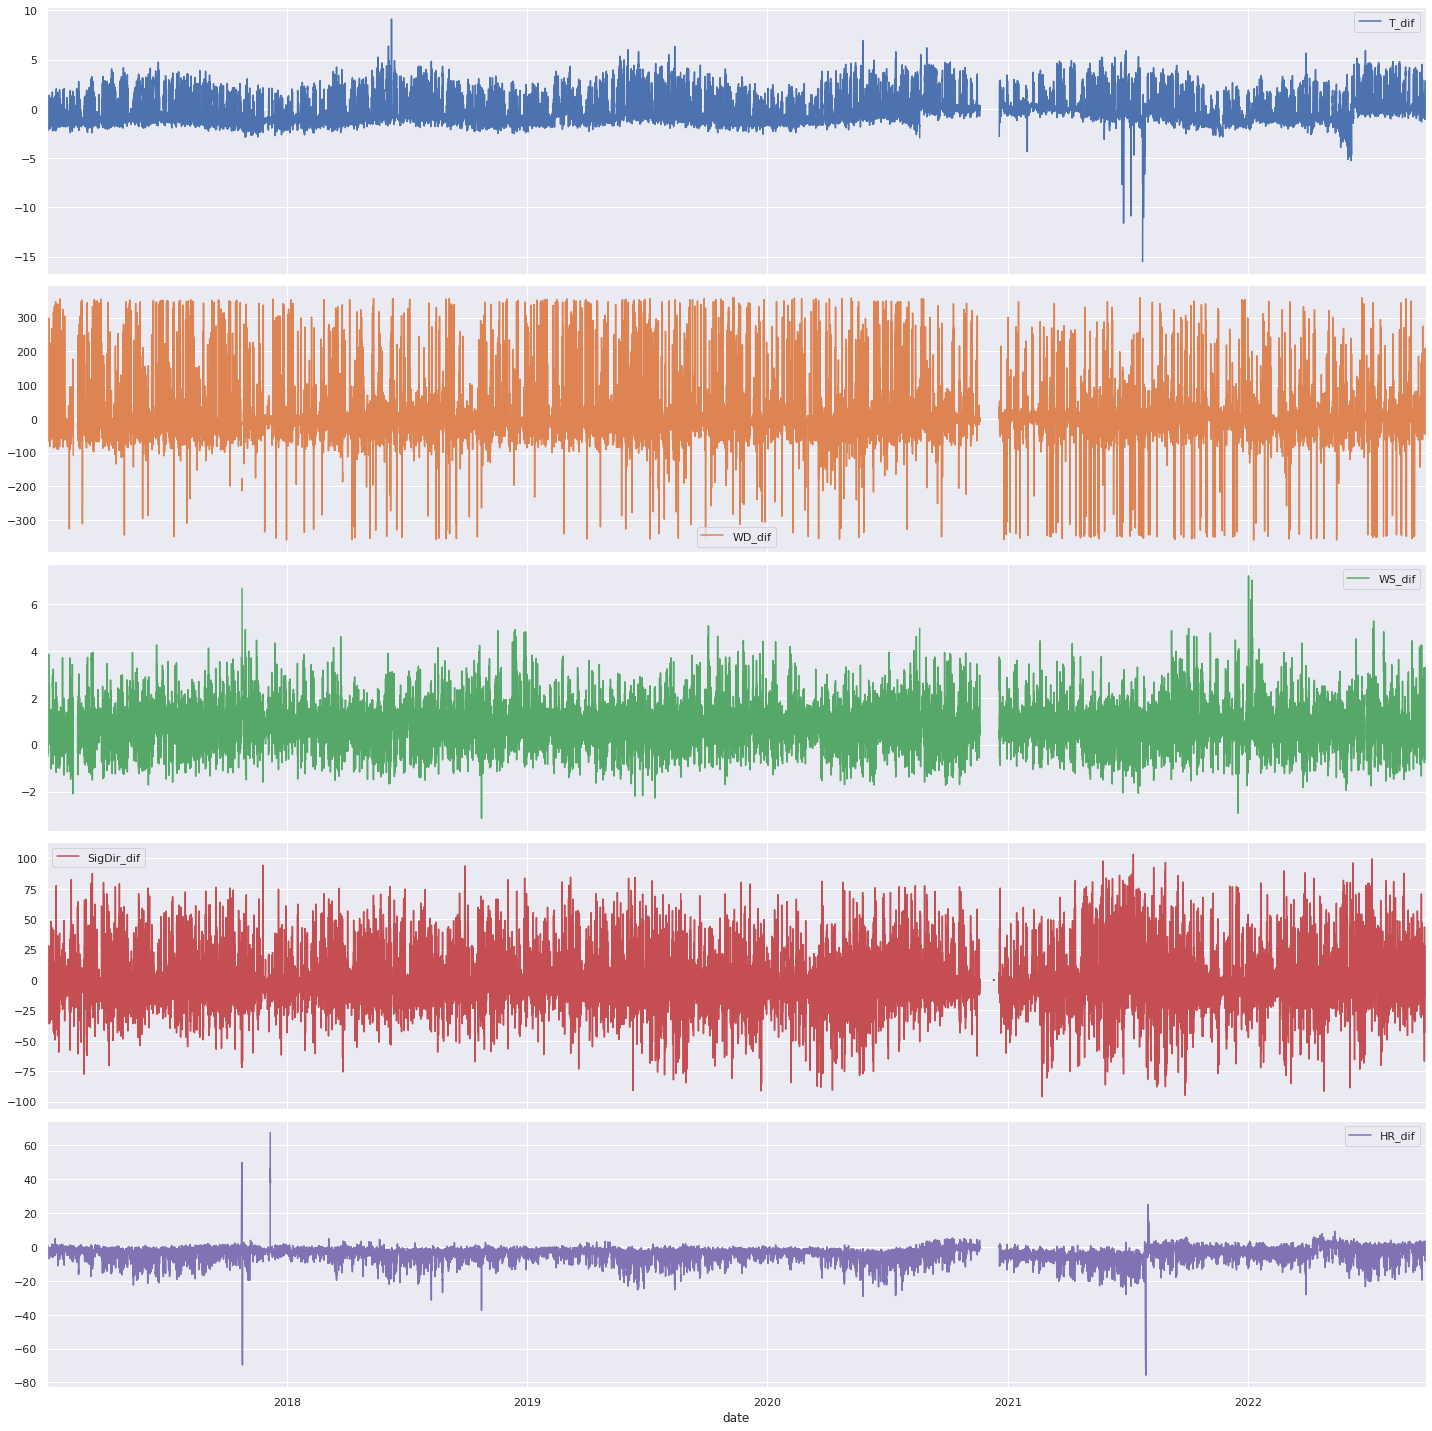

In [17]:
meteo_df.plot(figsize=(20,20),subplots=True)
plt.tight_layout()
plt.show()

- CEMS U1 Ventanas con datos desde 10-02-2020 hasta 16-08-2021
- CEMS Chimenea Codelco con datos desde enero 2021

Omitir U1 Ventanas y solo ocupar la ventana de tiempo de la Chimenea Codelco? O al revés?

### Datos nulos

In [18]:
meteo_df.isna().sum()

T_dif         1034
WD_dif        1251
WS_dif        1251
SigDir_dif     765
HR_dif         892
dtype: int64

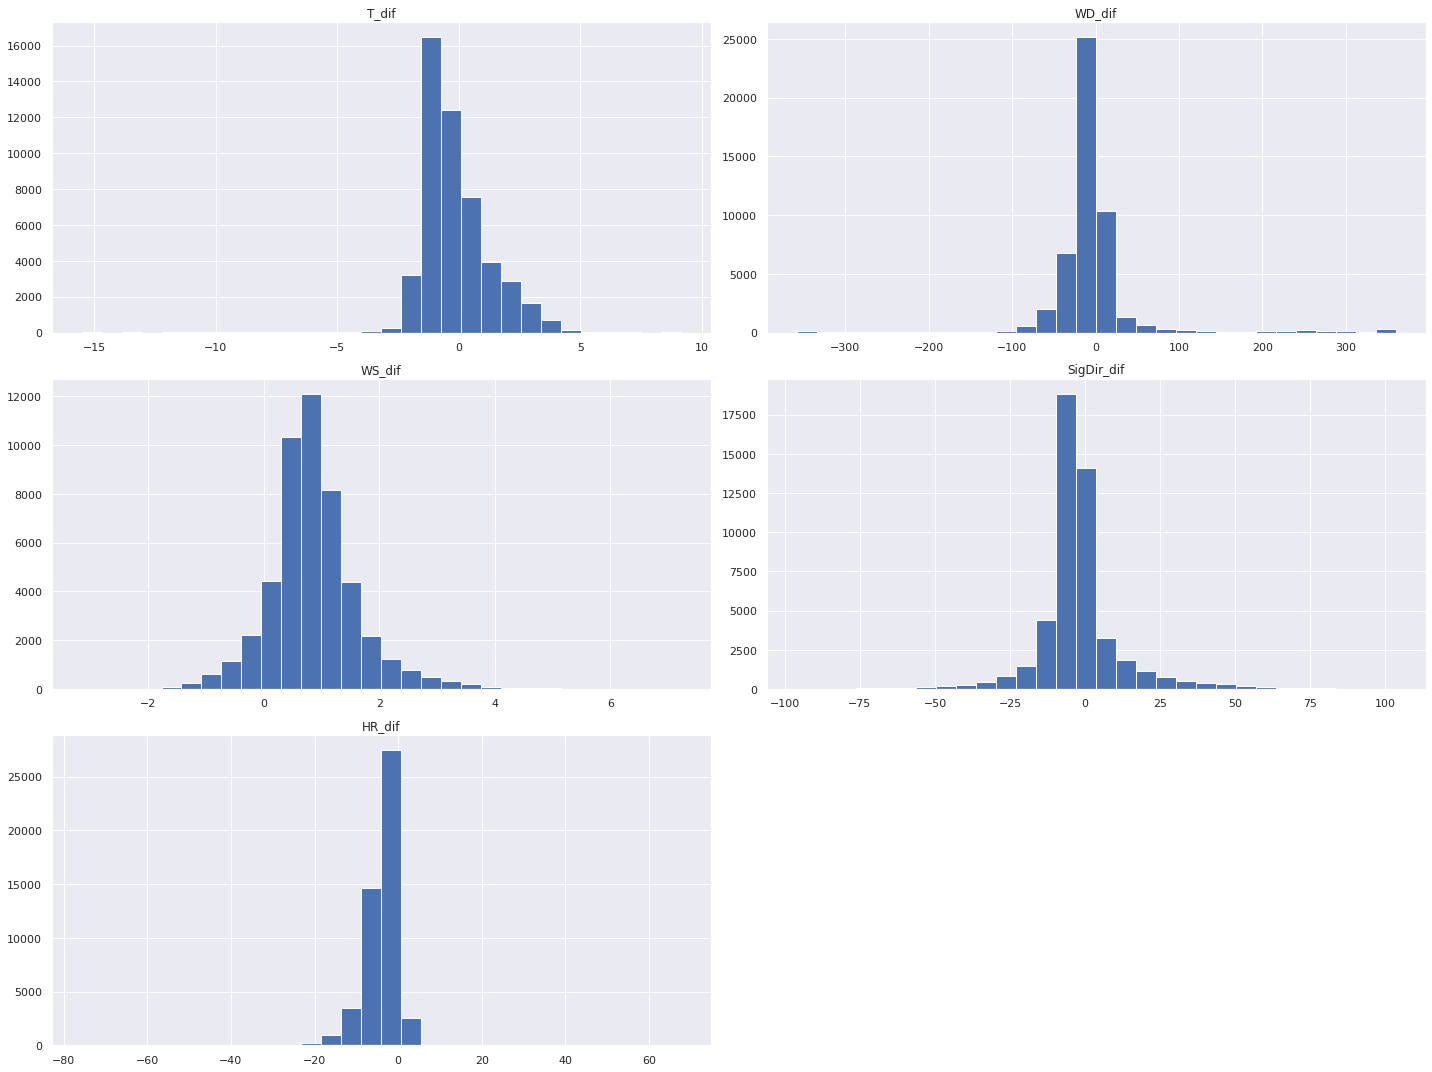

In [19]:
meteo_df.hist(figsize=(20,15), bins=30)
plt.tight_layout()
plt.show()

### Resumen estadístico

In [20]:
meteo_df.describe()

,T_dif,WD_dif,WS_dif,SigDir_dif,HR_dif
count,49264.000000,49047.000000,49047.000000,49533.000000,49406.000000
mean,-0.133752,-3.917870,0.866090,-2.051096,-3.993602
std,1.330180,56.044659,0.764589,14.404634,4.216981
min,-15.509450,-358.617514,-3.148450,-96.100000,-75.678700
25%,-1.005300,-19.258250,0.456765,-7.220000,-5.647425
50%,-0.487590,-8.950000,0.800370,-3.464000,-3.305650
75%,0.447000,2.779500,1.217789,0.320000,-1.681600
max,9.121700,359.789686,7.216470,103.400000,67.551000


### Cantidad de datos por fecha

In [41]:
meteo_df

,T_dif,WD_dif,WS_dif,SigDir_dif,HR_dif
0,0.2768,2.7303,-0.35788,20.98000,-6.2247
1,0.3665,-0.0120,-1.02448,37.48000,-6.1518
2,0.5527,-29.6691,0.76479,10.35800,-5.0900
3,0.8930,-43.4263,0.58976,0.69000,-5.2384
4,0.7969,-39.7236,0.02338,8.15001,-5.0584
...,...,...,...,...,...
50293,-0.6632,1.8720,0.98262,-1.92000,2.2718
50294,-0.7794,0.3100,1.52319,-3.16901,3.0937
50295,-0.6904,1.5470,1.17034,-4.19700,2.7113
50296,-0.5590,3.3720,1.22945,-2.67500,2.3008


In [46]:
meteo_df['year'] = meteo_df.date.apply(lambda x: x.year)
meteo_df['month'] = meteo_df.date.apply(lambda x: x.month)
meteo_df['hour'] = meteo_df.date.apply(lambda x: x.hour)

/tmp/ipykernel_7952/1319944361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_df['year'] = meteo_df.date.apply(lambda x: x.year)
/tmp/ipykernel_7952/1319944361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_df['month'] = meteo_df.date.apply(lambda x: x.month)
/tmp/ipykernel_7952/1319944361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

#### Anual

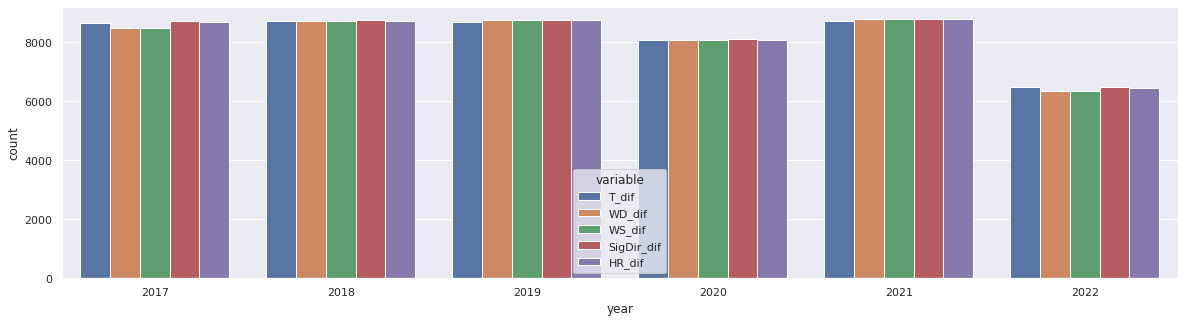

In [48]:
fig, ax = plt.subplots(figsize=(20,5))

sns.countplot(meteo_df.melt(id_vars=['year', 'month','hour'], value_vars=meteo_df.columns[1:-3]).dropna(), x='year', hue='variable', ax=ax)
plt.show()

#### Mensual

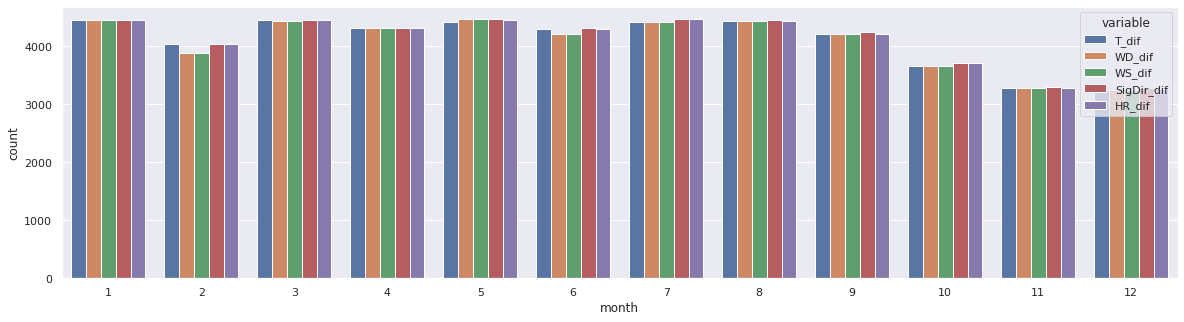

In [49]:
fig, ax = plt.subplots(figsize=(20,5))

sns.countplot(meteo_df.melt(id_vars=['year', 'month','hour'], value_vars=meteo_df.columns[1:-3]).dropna(), x='month', hue='variable', ax=ax)
plt.show()

#### Diario

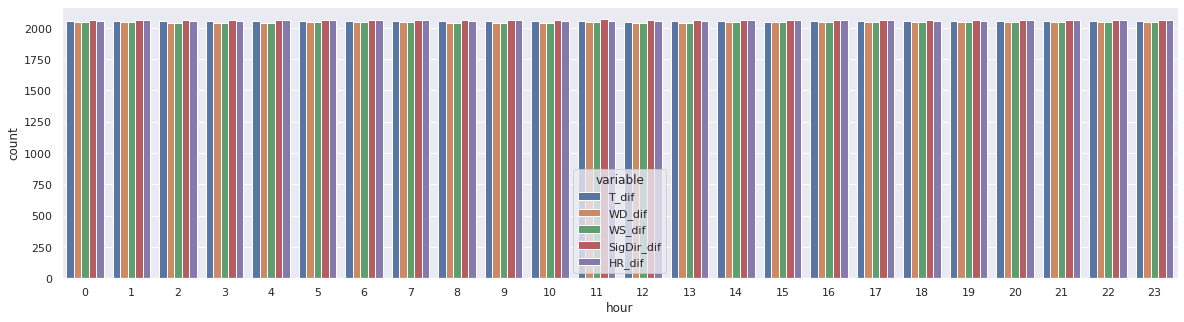

In [51]:
fig, ax = plt.subplots(figsize=(20,5))

sns.countplot(meteo_df.melt(id_vars=['year', 'month','hour'], value_vars=meteo_df.columns[1:-3]).dropna(), x='hour', hue='variable', ax=ax)
plt.show()

### Lag plots

#### 1 hora

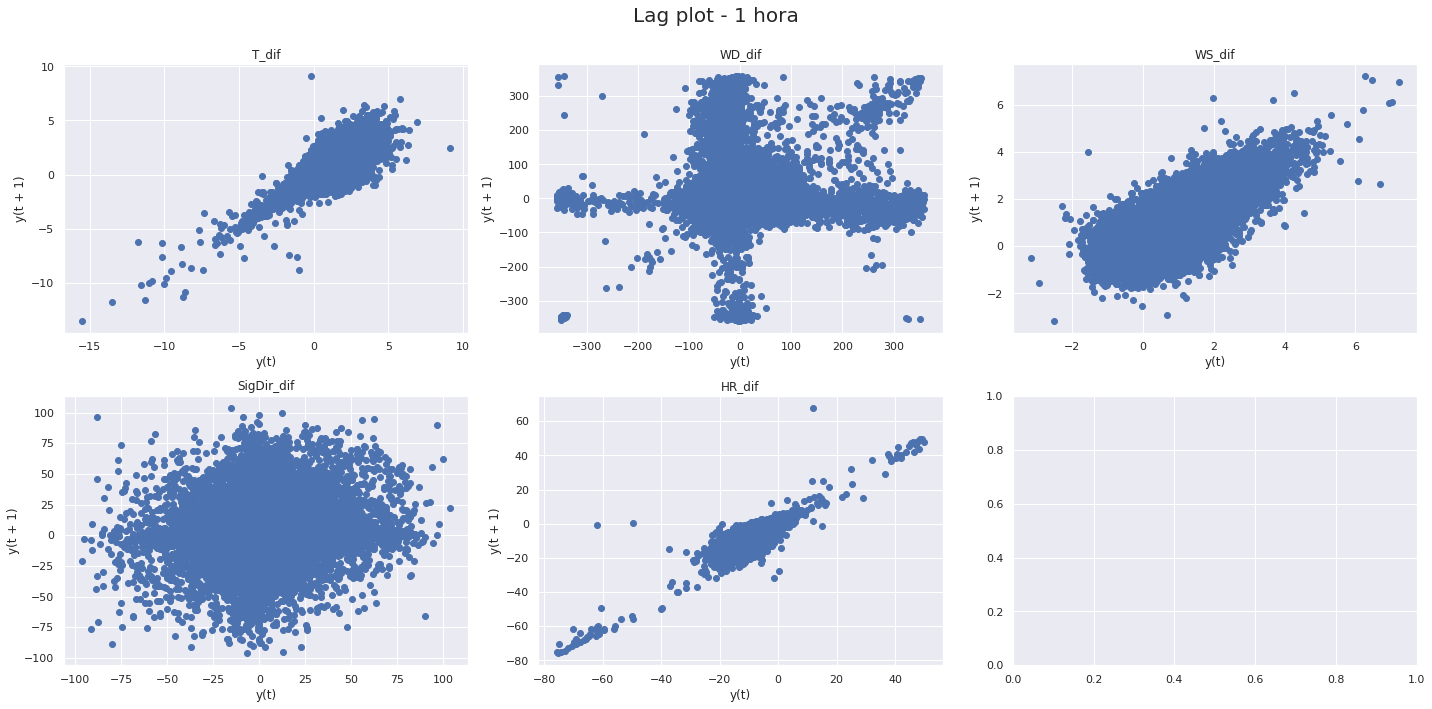

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

for idx, col in enumerate(meteo_df.columns):
    pd.plotting.lag_plot(meteo_df[col], lag=1, ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(col)

fig.suptitle('Lag plot - 1 hora', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#### 1 día

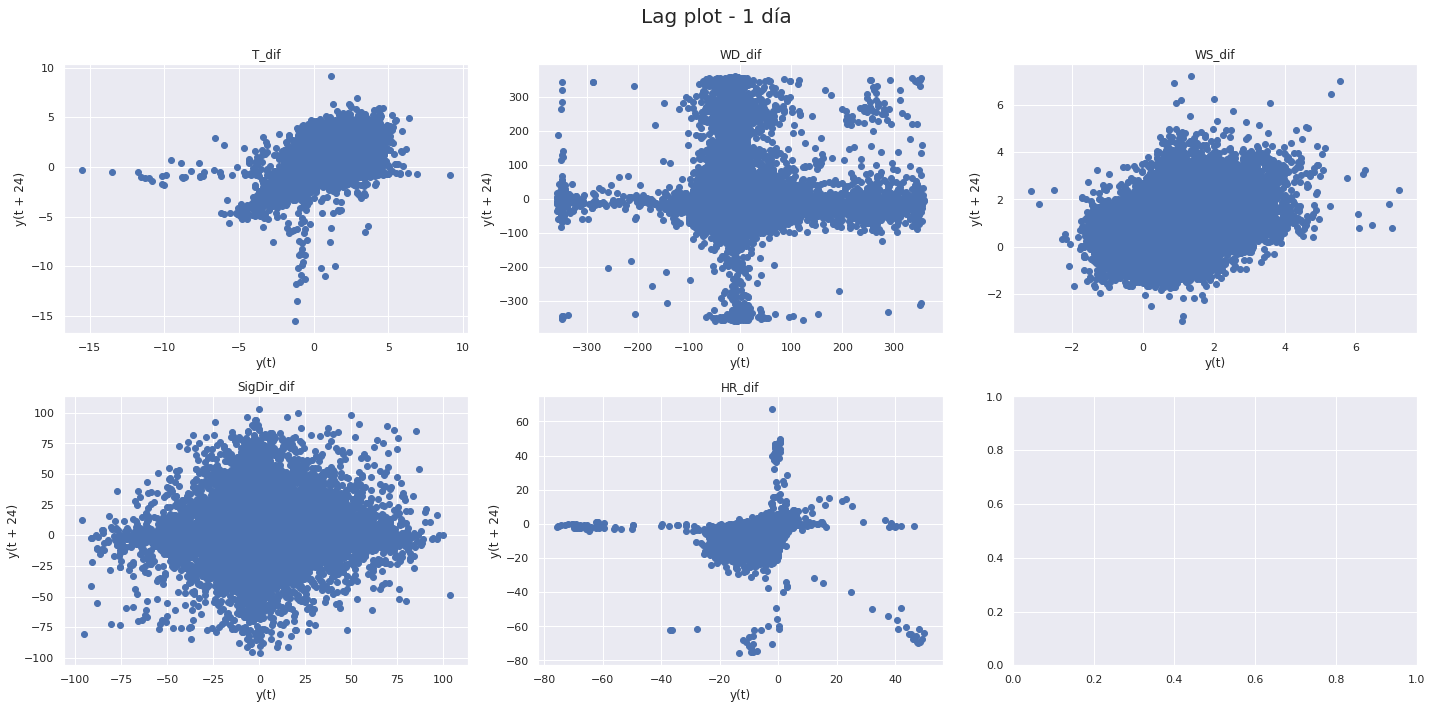

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

for idx, col in enumerate(meteo_df.columns):
    pd.plotting.lag_plot(meteo_df[col], lag=24, ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(col)

fig.suptitle('Lag plot - 1 día', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

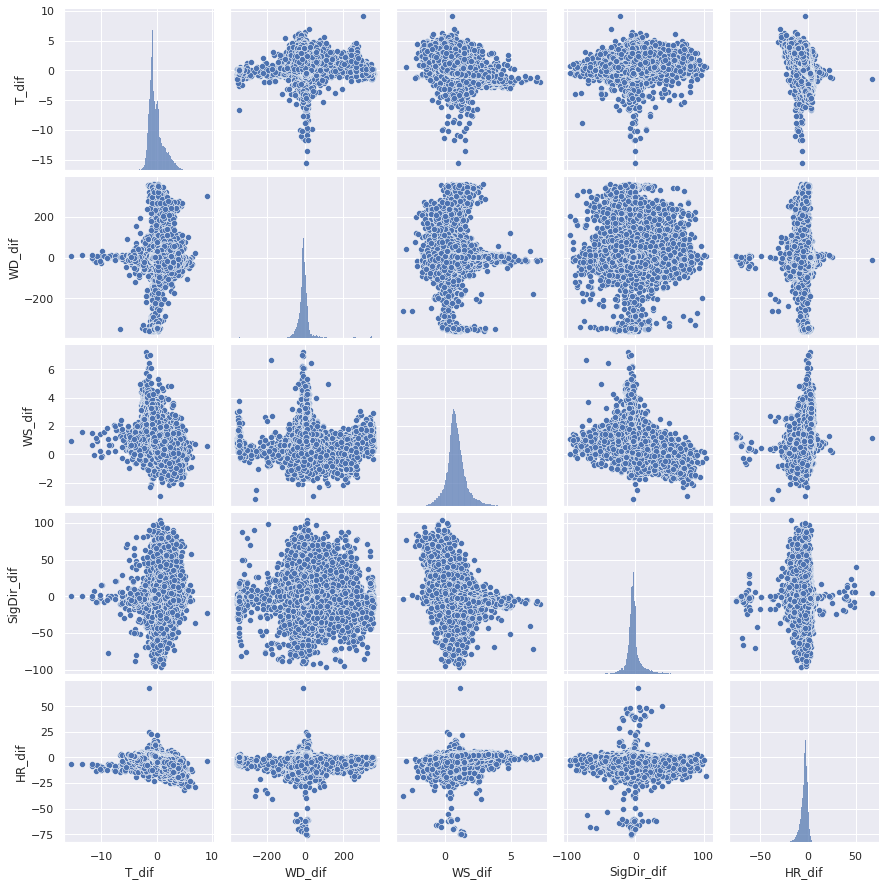

In [28]:
sns.pairplot(meteo_df)
plt.show()

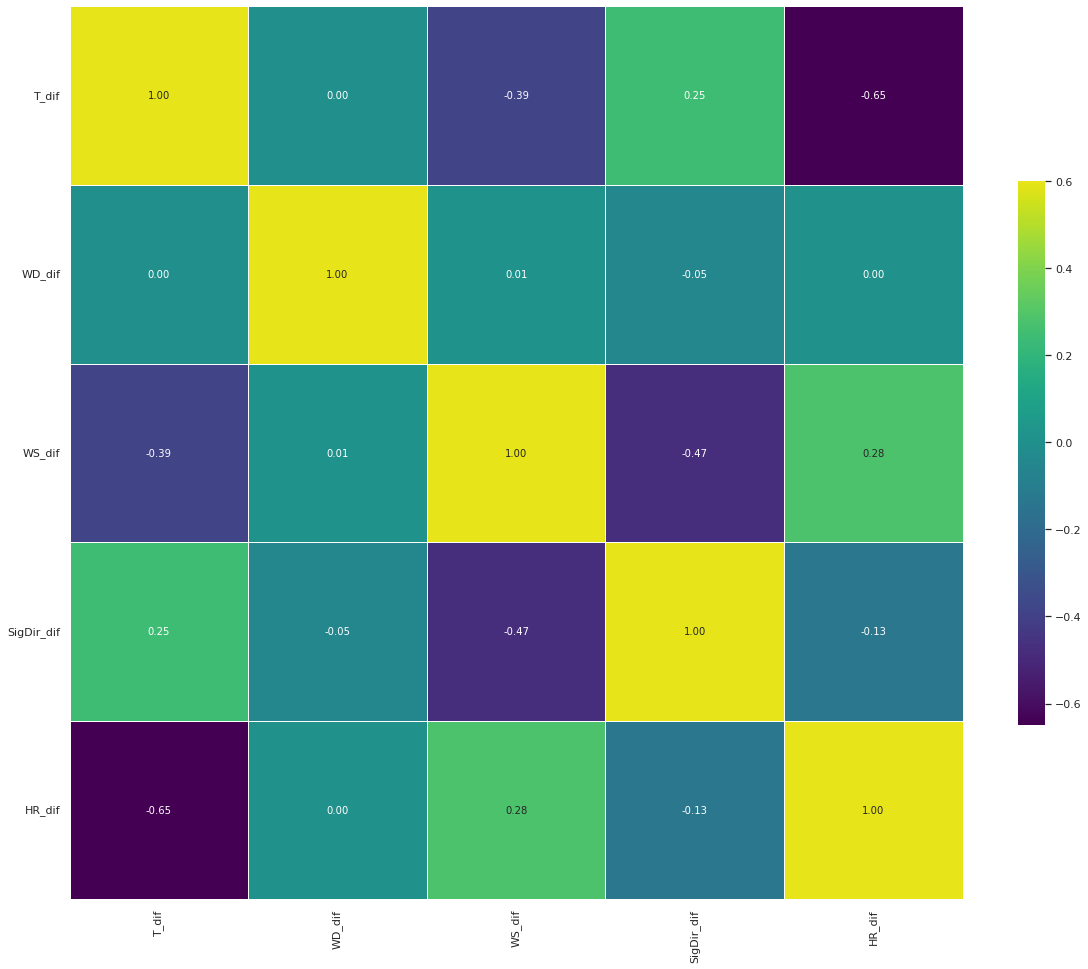

In [29]:
meteo_corr = meteo_df.corr(method='pearson')

g = sns.heatmap(meteo_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='viridis')
g.figure.set_size_inches(20,20)
    
plt.show()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

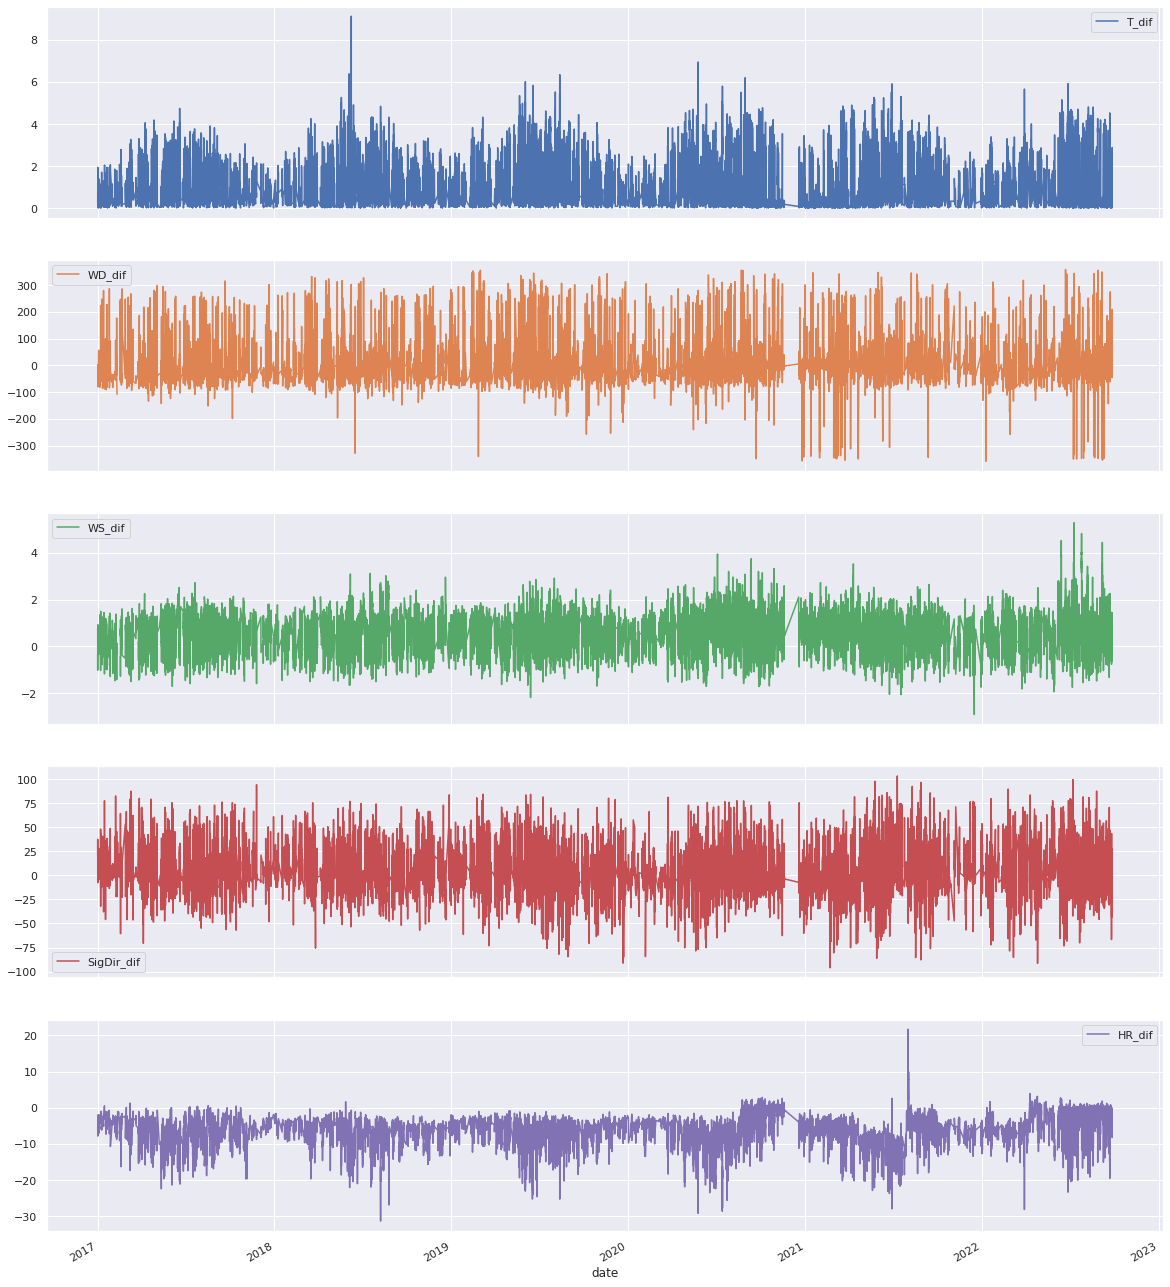

In [64]:
meteo_df.loc[meteo_df.T_dif > 0].plot(figsize=(20,25), subplots=True)